In [ ]:
# Programa que lee algunos de los campos de los ficheros .wav

import struct as st
import numpy as np

def leeWave(fileWave):
    with open(fileWave, 'rb') as fpWave:
        formato = '<4s'
        chunkID = fpWave.read(st.calcsize(formato))
        if chunkID != b'RIFF':
            raise Exception(f'El fichero {fileWave} no tiene formato RIFF.')
        

In [2]:
leeWave('Classe_07_05.ipynb')

Exception: El fichero Classe_07_05.ipynb no tiene formato RIFF.

In [7]:
# Programa que lee algunos de los campos de los ficheros .wav

import struct as st
import numpy as np

def leeWave(fileWave):
    with open(fileWave, 'rb') as fpWave:
        formato = '<4sI4s'
        datos = fpWave.read(st.calcsize(formato))
        chunkID, chunkSize, formato = st.unpack(formato, datos)
        if chunkID != b'RIFF' or formato != b'WAVE':
            raise Exception(f'El fichero {fileWave} no tiene formato WAVE.')
        print(f'El tamaño del fichero es {chunkSize + 8} bytes.')

In [8]:
leeWave('luzbel44.wav')

El tamaño del fichero es 190226 bytes.


In [16]:
# Podemos forzar al puntero a ir a una posición concreta. 

import struct as st
import numpy as np

def leeWave(fileWave):
    with open(fileWave, 'rb') as fpWave:
        formato = '<4sI4s'
        datos = fpWave.read(st.calcsize(formato))
        chunkID, chunkSize, formato = st.unpack(formato, datos)
        if chunkID != b'RIFF' or formato != b'WAVE':
            raise Exception(f'El fichero {fileWave} no tiene formato WAVE.')
        
        fpWave.seek(36, 0) # Posición 36 desde el principio
        formato = '<4sI'
        datos = fpWave.read(st.calcsize(formato))
        subChunk2ID, subChunk2Size = st.unpack(formato, datos)
        nMostres = subChunk2Size // 2

        formato = f'<{nMostres}h'
        datos = fpWave.read(st.calcsize(formato))
        mostres = st.unpack(formato, datos)
    return np.array(mostres)



In [19]:
algo = leeWave('luzbel44.wav')

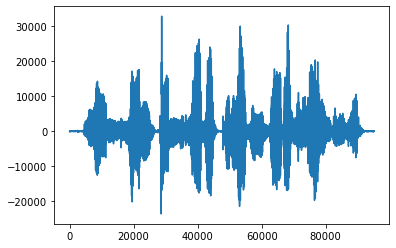

In [20]:
import matplotlib.pyplot as plt

plt.plot(algo)

# Expresiones regulares
---
Una expresion regular es una gramatica que describe cadenas de texto.

Utilizaremos la biblioteca `re`

In [22]:
# leer el fichero alumnos.txt y extraer la información 

import struct as st

with open('alumnos.txt', 'rt') as fpAlumnos:
    for alumno in fpAlumnos:
        # print(alumno)
        # para eliminar espacios:
        print(alumno.strip())

25       Ramon Llobet Duch   7
26       Mark Bonete Ventura   6
32       Pol Alaminos Martorell   5


In [ ]:
import re as re

# re.search() # Localiza en la cadena la expresion regular y la devuelve si la encuentra
# Argumentos:  'Cadena a localizar', 'Cadena en la que buscar' 
# re.match()  # Hace lo mismo que .search pero solo al principio de la cadena

re.search('Expresion regular', 'El literal es la Expresion regular mas sencilla') # Solo funciona si encuentra coincidencias literales

<re.Match object; span=(17, 34), match='Expresion regular'>

In [26]:
# El punto '.' es cualquier caracter
re.search('.xpresion regular', 'El literal es la Expresion regular mas sencilla')

<re.Match object; span=(17, 34), match='Expresion regular'>

In [ ]:
# El circumflejo ^ indica que hay que buscar al principio de cadena 
re.search('^xpresion regular', 'El literal es la Expresion regular mas sencilla')

In [29]:
re.search('^El literal', 'El literal es la Expresion regular mas sencilla')

<re.Match object; span=(0, 10), match='El literal'>

In [ ]:
# El $ indica final de la cadena (el ultimo caracter)
re.search('sencilla$', 'Antes muerta que sencilla')

<re.Match object; span=(17, 25), match='sencilla'>

In [35]:
# el asterisco * permite repetir tantas veces como queramos el ultimo caracter (0 o màs repeticiones) 
# Para 1 o màs repeticiones seria con el signo +
re.search('sencilla*','Antes muerta que sencillaaaaaaaaaaa')
re.search('sencilla*','Antes muerta que sencill')

<re.Match object; span=(17, 24), match='sencill'>

In [ ]:
# El interrogante ? 
re.search('sencilla?$','Antes muerta que sencill')

<re.Match object; span=(17, 24), match='sencill'>

In [ ]:
# El intervalo dentro de la llave indica el numero de repeticiones permitido
re.search('sencilla{3,5}$','Antes muerta que sencillaaaaa')

{m, n}

* = { , }

+ = {1, }

? = {0,1}

{n} = {n,n}

In [ ]:
# Los caracteres entre corchetes permitiran cualquiera de las variaciones (solo los caracteres contenidos en [])
re.search('sencill[aoi]','Antes muerta que sencillo')

<re.Match object; span=(17, 25), match='sencillo'>

In [ ]:
# Si usamos el circumflejo indicamos caracteres prohibidos
# Los parentesis sirven para agrupar. 
# Otro caracter especial es | que permite elegir entre opciones 
# \ elimina el significado especial (por ejemplo si queremos encontrar en la cadena un ? o un parentesis)

In [49]:
re.search('https:\\\\\\\\upc.edu', 'https:\\\\upc.edu\\eseiaat')

<re.Match object; span=(0, 15), match='https:\\\\upc.edu'>

In [50]:
re.search(r'https:\\upc.edu', 'https:\\upc.edu\eseiaat')

<re.Match object; span=(0, 14), match='https:\\upc.edu'>